In [1]:
# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, transpile, assemble

# import basic plot tools
from qiskit.visualization import plot_histogram

In [2]:
n = 4
m=1
quantum_circuit = QuantumCircuit(2*m+n,n+m)

# Apply Hadamard gates before querying the oracle
quantum_circuit.h([0,1,2,3,4])    
    
# Apply barrier for visual separation
quantum_circuit.barrier()

quantum_circuit.cx(0,5)
quantum_circuit.cx(1,5)
quantum_circuit.cx(2,5)
quantum_circuit.cx(3,5)

# Apply barrier for visual separation


quantum_circuit.barrier()

# Apply Hadamard gates to the input register
quantum_circuit.cx(4,5)
quantum_circuit.h([0,1,2,3,4])

# Measure qubits
quantum_circuit.measure(range(n+m),range(n+m))
quantum_circuit.draw()

┌───┐ ░                      ░ ┌───┐     ┌─┐            
q_0: ┤ H ├─░───■──────────────────░─┤ H ├─────┤M├────────────
     ├───┤ ░   │                  ░ ├───┤     └╥┘┌─┐         
q_1: ┤ H ├─░───┼────■─────────────░─┤ H ├──────╫─┤M├─────────
     ├───┤ ░   │    │             ░ ├───┤      ║ └╥┘┌─┐      
q_2: ┤ H ├─░───┼────┼────■────────░─┤ H ├──────╫──╫─┤M├──────
     ├───┤ ░   │    │    │        ░ ├───┤      ║  ║ └╥┘┌─┐   
q_3: ┤ H ├─░───┼────┼────┼────■───░─┤ H ├──────╫──╫──╫─┤M├───
     ├───┤ ░   │    │    │    │   ░ └───┘┌───┐ ║  ║  ║ └╥┘┌─┐
q_4: ┤ H ├─░───┼────┼────┼────┼───░───■──┤ H ├─╫──╫──╫──╫─┤M├
     └───┘ ░ ┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐ ░ ┌─┴─┐└───┘ ║  ║  ║  ║ └╥┘
q_5: ──────░─┤ X ├┤ X ├┤ X ├┤ X ├─░─┤ X ├──────╫──╫──╫──╫──╫─
           ░ └───┘└───┘└───┘└───┘ ░ └───┘      ║  ║  ║  ║  ║ 
c: 5/══════════════════════════════════════════╩══╩══╩══╩══╩═
                                               0  1  2  3  4

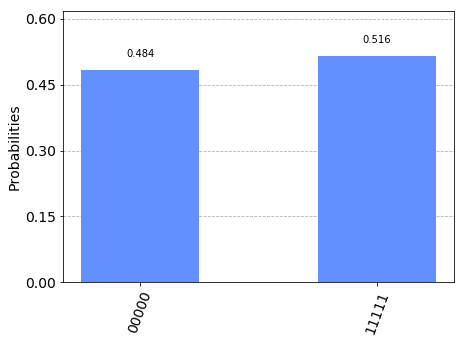

In [5]:
# use local simulator
aer_sim = Aer.get_backend('aer_simulator')
shots = 1024
qobj = assemble(quantum_circuit, shots=shots)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)